In [3]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

def prettyPicture(clf, X_test, y_test, name):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig(name)

import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end
                                    


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

def drawInline(clf, X_test, y_test):
    #X_test = features_test
    #y_test = labels_test

    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


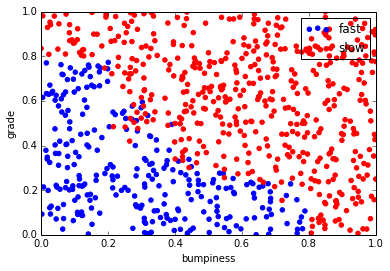

In [3]:
#!/usr/bin/python

import matplotlib.pyplot as plt
#from prep_terrain_data import makeTerrainData
#from class_vis import prettyPicture

#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
    #make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

    ### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test





features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
#plt.show()
################################################################################


In [3]:
def Bayesclassifier(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
    
    ### your code goes here!
    
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    clf.fit(features_train, labels_train)
    
    return clf

In [21]:

## your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

Bayesclf = Bayesclassifier(features_train, labels_train)
pred = Bayesclf.predict(features_test)


In [22]:
print Bayesclf.score(features_test, labels_test)

0.884


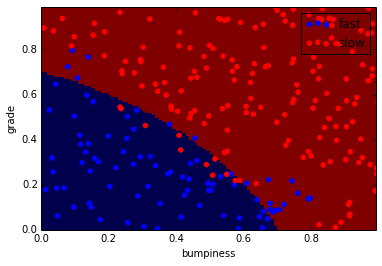

In [23]:
#prettyPicture(clf, features_test, labels_test, "aBayes.png")

drawInline(Bayesclf, features_test, labels_test)

In [61]:
def svmClassifier(features_train, labels_train, mykernel="linear" ):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
    
    ### your code goes here!
    
    from time import time
    from sklearn import svm
    from sklearn.metrics import accuracy_score
    #clf = svm.SVC(kernel = "rbf", max_iter = 10000000, C = 100000000)
    
    clf = svm.SVC(kernel = mykernel)
    t0 = time()
    clf.fit(features_train, labels_train)
    print "training time:", round(time()-t0, 3), "s" # train 2.55 s

    t1 = time()
    pred = clf.predict(features_test)
    print "predict time:", round(time()-t1, 3), "s"  # predict 0.334 s
    
    return clf

In [62]:
linearsvmclf = svmClassifier(features_train, labels_train)
pred = linearsvmclf.predict(features_test)

training time: 0.084 s
predict time: 0.002 s


In [64]:
from sklearn.metrics import accuracy_score
print accuracy_score(pred, labels_test)

0.92


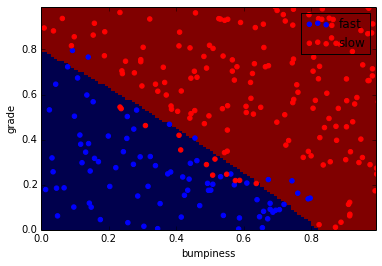

In [26]:
drawInline(linearsvmclf, features_test, labels_test)

In [13]:
#prettyPicture(clf, features_test, labels_test, "aSVM.png")

In [4]:
### if you try with rbf kernel ... ####
'''
我想看到这里各位同学应该能理解为什么 svm with rbf kernel会这么强大，
因为在选用rbf kernel时，数据已经被映射到了无穷维的空间中去，从而保证数据一定是线性可分的。
'''

def svmRBFClassifier(features_train, labels_train, mykernel="rbf" ):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
    
    ### your code goes here!
    
    from time import time
    from sklearn import svm
    from sklearn.metrics import accuracy_score
    
    #gamma = 'auto' , max_iter = 10000000, C = 100000000
    clf = svm.SVC(kernel = mykernel, max_iter = 10000000, C = 1000000, gamma = 500.0) #
    t0 = time()
    clf.fit(features_train, labels_train)
    print "training time:", round(time()-t0, 3), "s" # train 2.55 s

    t1 = time()
    pred = clf.predict(features_test)
    print "predict time:", round(time()-t1, 3), "s"  # predict 0.334 s
    
    return clf

# max_iter, C as Penalty parameter of error needs big value!
RbfSvmClf = svmRBFClassifier(features_train, labels_train, "rbf")
pred = RbfSvmClf.predict(features_test)

training time: 0.054 s
predict time: 0.002 s


In [5]:
from sklearn.metrics import accuracy_score
print accuracy_score(pred, labels_test)

0.932


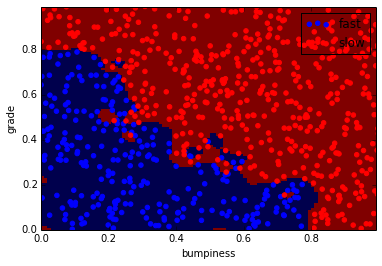

In [59]:
drawInline(RbfSvmClf, features_train, labels_train)

In [ ]:

'''
Conclustion for SVM:
1, sensitive for lots of noise | try naive-bayes
2, long training time O(n**3) for large training dataset, 
    much slower than naive bayes
3, enhanced by 1) soft-margin 2) kernel method
'''

In [35]:
####### mini project, email classify ###########3

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
email_features_train, email_features_test, email_labels_train, email_labels_test = preprocess()



no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [9]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

features_train = email_features_train
labels_train = email_labels_train

t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s" # train 2.55 s

t1 = time()
pred = clf.predict(features_test)
print "predict time:", round(time()-t1, 3), "s"  # predict 0.334 s

print clf.score( features_test , labels_test ) 

training time: 1.655 s
predict time: 0.234 s
0.973265073948


In [18]:
from time import time
from sklearn import svm
from sklearn.metrics import accuracy_score
#clf = svm.SVC(kernel = "rbf", max_iter = 10000000, C = 100000000)

svmclf = svm.SVC(kernel = 'rbf', C=10000.0)


#features_train1 = features_train[:len(features_train)/100] 
#labels_train1 = labels_train[:len(labels_train)/100] 

features_train1 = email_features_train
labels_train1 = email_labels_train

t0 = time()
svmclf.fit(features_train1, labels_train1)
print "training time:", round(time()-t0, 3), "s" # train 2.55 s

t1 = time()
pred = svmclf.predict(features_test)
print "predict time:", round(time()-t1, 3), "s"  # predict 0.334 s


pred = svmclf.predict(features_test)

print accuracy_score(pred, labels_test)


training time: 129.918 s
predict time: 14.328 s
0.990898748578


In [22]:
print pred.shape

(1758,)


In [21]:
print np.count_nonzero(pred)

877


In [20]:
print np.sum(pred)

877


In [19]:
print sum(pred)

877


In [ ]:
'''
希望 Sebastian 在说朴素贝叶斯非常适合文本时，更清楚地表达了他的意思。
对于这一具体问题，朴素贝叶斯不仅更快，而且通常比 SVM 更出色。当然，SVM 更适合许多其他问题。
你在第一次求解问题时就知道该尝试哪个算法，这是机器学习艺术和科学性的一个体现。
除了选择算法外，视你尝试的算法而定，你还需要考虑相应的参数调整以及过拟合的可能性（特别是在你没有大量训练数据的情况下）。

我们通常建议你尝试一些不同的算法来求解每个问题。
调整参数的工作量很大，但你现在只需要听完这堂课，
我们将向你介绍 GridCV，一种几乎能自动查找最优参数调整的优秀 sklearn 工具。
'''

In [6]:
from sklearn import tree

In [7]:
def DecisionTreeClassify(features_train, labels_train):

    
    clf = tree.DecisionTreeClassifier(min_samples_split=2)
    clf.fit(features_train, labels_train)
    
    return clf

In [8]:
DTclf = DecisionTreeClassify(features_train, labels_train)

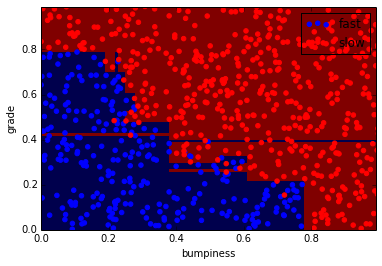

In [34]:
drawInline(DTclf, features_train, labels_train)

In [36]:
pred = DTclf.predict(features_test)

from sklearn.metrics import accuracy_score


acc = accuracy_score(pred, labels_test)
### be sure to compute the accuracy on the test set

print round(acc,3)
    


0.908


In [9]:


clf50 = tree.DecisionTreeClassifier(min_samples_split=50)
clf50.fit(features_train, labels_train)


pred50 = clf50.predict(features_test)



acc_min_samples_split_50 = accuracy_score(pred50, labels_test)

print acc_min_samples_split_50

0.912


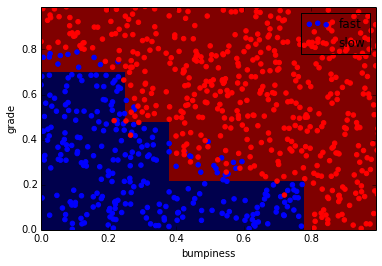

In [10]:
drawInline(clf50, features_train, labels_train)

In [51]:
'''
熵公式
某些来源使用其他的对数底（例如，它们可能使用对数底 10 或底为大约 2.72 的自然对数）
    ——这些细节可能会改变你可以获得的熵的最大值。在我们的情况中（有 2 个类），我们使用的对数底为 2 的公式将具有最大值 1。

实际上，在使用决策树时，很少需要处理对数底的细节——这里的结论是，较低的熵指向更有条理的数据，而且决策树将此用作事件分类方式。
'''

import math

In [52]:
- 0.5 * math.log(0.5 , 2) - 0.5 * math.log(0.5 , 2) 

1.0

In [ ]:
'''
decision tree to maximazie information gain, i.e. maximaze entropy
'''

In [61]:
'''
 if split based on grade :
'''

import scipy.stats
print "entropy:", -3.0/4* scipy.stats.entropy([2,1],base=2) - 1.0/4 * 0

entropy: -0.688721875541


In [65]:
print "information gain = entropy(parent) - [weighed average]entropy(children): ", 
1- 3.0/4* scipy.stats.entropy([2,1],base=2) - 1.0/4 * 0

information gain = entropy(parent) - [weighed average]entropy(children): 

0.31127812445913294

In [ ]:
'''
 if split decision tree based on bumpy/smooth --> information gain = 0, 
 then do not build up decision tree on this variable
'''

In [ ]:
￼￼￼'''
选择一个最佳属性进行划分
对每一个子节点迭代进行划分，知道完全划分开
'''

In [ ]:
'''
优点

可解释性好
只需要很少的数据预处理工作。并且能够处理各种类型的特征
原生支持多分类


缺点

数值型数据必须离散化
决策树容易过拟合
决策树不稳定，也就是说可能数据集的一个很小的变动就会导致树发生很大的改变。
构建一个最佳的决策树是一个NP-hard问题，现有的启发式算法不能够保证最优（也没有一个理论的上下界）。
简单的决策树模型比较简单，很难表示数据集中的复杂关系。
'''

In [70]:

###  decision tree for email mini project ####
'''
决策树迷你项目

在这个项目中，我们使用决策树再次将邮件进行分类，启动代码是
decision_tree/dt_author_id.py。


第一部分：让决策树运行起来
构建一个决策树运行的分类器，设置 min_samples_split=40。开始训练之前，这可能需要一
些时间。那精确度是多少？

第二部分：加速
在 SVM 迷你项目中，你会发现参数调节能显著加速机器学习算法的训练时间。一般的规律是参
数可以调整算法的复杂度，通常更加复杂的算法意味着运行得更慢。
另外一个方法是通过训练/测试所使用的特征数量控制算法的复杂度。算法中可用的特征越多，出
现复杂拟合的可能性就越大。我们会在“特征选择”的课程中详细讨论这个问题，不过现在你可
以先预览一下。

-- 从你的数据中找出特征的数量，数据是以 numpy 数组的形式排列的，其中数组的行数代
表数据点的数量，列数代表特征的数量；为了码提取这个数值，可以写一行这样的代码
len(features_train[0])

'''

import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
email_features_train, email_features_test, email_labels_train, email_labels_test = preprocess()

DTclf40 = tree.DecisionTreeClassifier(min_samples_split=40)
DTclf40.fit(email_features_train, email_labels_train)








no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [71]:
print len(email_features_train[0])

3785


In [73]:
pred40 = DTclf40.predict(email_features_test)

acc_min_samples_split_40 = accuracy_score(pred40, email_labels_test)

print acc_min_samples_split_40

0.976109215017


In [ ]:
'''
-- 加入 tools/email_preprocess.py，会看到这样的代码：selector =
SelectPercentile(f_classif, percentile=1)，将 percentile 从 10 改为 1。
-- 现在的特征数量是多少呢？
-- 你认为 SelectPercentile 起到什么作用？其他所有的都不变的情况下，赋予 percentile 的
值较大是否得到一棵更加复杂的或者简化的决策树？
-- 注意训练时间的不同取决于特征的数量。
-- 当 percentile 等于 1 时，准确度是多少？
'''


In [82]:
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
email_features_train, email_features_test, email_labels_train, email_labels_test = preprocess()

print len(email_features_train[0])

no. of Chris training emails: 7936
no. of Sara training emails: 7884
3785


In [83]:
DTclf40_new = tree.DecisionTreeClassifier(min_samples_split=40)
DTclf40_new.fit(email_features_train, email_labels_train)

pred40_new = DTclf40_new.predict(email_features_test)

acc_min_samples_split_40 = accuracy_score(pred40_new, email_labels_test)

print acc_min_samples_split_40

0.978953356086


In [ ]:
'''
任何数据分析师具备的一项关键技能就是不断从机器学习中得到新的认识，这也是本节课的学习目标。
这节课的内容是一个迷你项目。目标是用你选择的算法来做地形分类，并由你自己进行研究和部署。

可选的算法如下：

1) k nearest neighbors（k 最近邻 或 KNN）: classic, simple, easy to understand

2) ensemble methods : meta classifiers built from usually many decision trees

random forest（随机森林）

adaboost（有时也叫“被提升的决策树”）



我们无法检查你的结果，因为你有太多的算法和参数组合可以尝试了，
但是你看到过我们上一个算法（朴素贝叶斯、SVM、决策树）所得出的准确率，因此你可以自行评估新的算法是否更好。

你将在 choose_your_own/your_algorithm.py 文件中寻找初始代码来准备你的数据。
以下视频还给出了更多你应该遵循的算法和过程的细节，不过你需要自行去发现。祝你好运！
'''

In [ ]:
'''
Process:

1. do research ! get a general understanding

2. sklearn document

3. deploy, get hands dirty

4. use it to make predictions

5. evaluate with accuracy

'''

In [11]:
'''
KNN

1、优点
简单，易于理解，易于实现，无需估计参数，无需训练
适合对稀有事件进行分类（例如当流失率很低时，比如低于0.5%，构造流失预测模型）
特别适合于多分类问题(multi-modal,对象具有多个类别标签)，例如根据基因特征来判断其功能分类，kNN比SVM的表现要好
①算法简单直观，易于实现；
②不需要产生额外的数据来描述规则，它的规则就是训练数据（样本）本身， 并不是要求数据的一致性问题，即可以存在噪音；
③KNN方法虽然从原理上也依赖于极限定理，但在类别决策时，只与极少量的 相邻样本有关。
因此，采用这种方法可以较好地避免样本数量的不平衡问题
④从分类过程来看，KNN方法最直接地利用了样本之间的关系，减少了类别特 征选择不当对分类结果造成的不利影响，
可以最大程度地减少分类过程中的误差 项。对于一些类别特征不明显的类别而言，KNN法更能体现出其分类规则独立性
的优势，使得分类自学习的实现成为可能。


2、缺点
懒惰算法，对测试样本分类时的计算量大，内存开销大，评分慢
可解释性较差，无法给出决策树那样的规则。

1)分类速度慢 最近邻分类器是基于实例学习的懒惰学习方法，因为它是根据所给训练样本 构造的分类器，
是将所有训练样本首先存储起来，当要进行分类时，就临时进行 计算处理。
需要计算待分样本与训练样本库中每一个样本的相似度，才能求得与 其最近的K个样本。
对于高维样本或样本集规模较大的情况，其时间和空间复杂 度较高，时间代价为O (mn)，
其中m为向量空间模型空间特征维数，n为训练样本集大小。

2)样本库容量依赖性较强 对KNN算法在实际应用中的限制较大：有不少类别无法提供足够的训练样本， 
使得KNN算法所需要的相对均匀的特征空间条件无法得到满足，使得识别的误差 较大。

3)特征作用相同 与决策树归纳方法和神经网络方法相比，传统最近邻分类器认为每个属性的
作用都是相同的（赋予相同权重）。样本的距离是根据样本的所有特征（属性）计 算的。
在这些特征中，有些特征与分类是强相关的，有些特征与分类是弱相关的， 还有一些特征（可能是大部分）与分类不相关。
这样，如果在计算相似度的时候， 按所有特征作用相同来计算样本相似度就会误导分类过程。

4)K值的确定 KNN算法必须指定K值，K值选择不当则分类精度不能保证。

'''

from sklearn.neighbors import KNeighborsClassifier
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(features_train, labels_train) 

KnnPred3 = neigh3.predict(features_test)



acc_knn3 = accuracy_score(KnnPred3, labels_test)

print acc_knn3

0.936


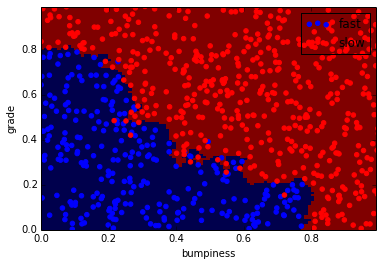

In [12]:
drawInline(neigh, features_train, labels_train)

In [13]:
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(features_train, labels_train) 

KnnPred5 = neigh5.predict(features_test)



acc_knn5 = accuracy_score(KnnPred5, labels_test)

print acc_knn5

0.92


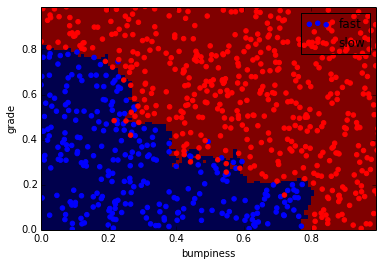

In [14]:
drawInline(neigh5, features_train, labels_train)

In [15]:
neigh10 = KNeighborsClassifier(n_neighbors=10)
neigh10.fit(features_train, labels_train) 

KnnPred10 = neigh10.predict(features_test)



acc_knn10 = accuracy_score(KnnPred10, labels_test)

print acc_knn10

0.932


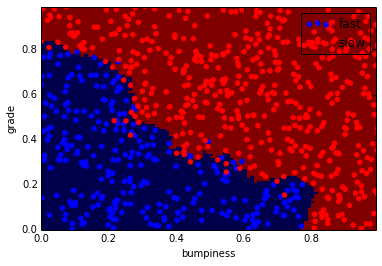

In [16]:
drawInline(neigh10, features_train, labels_train)

In [17]:
neigh100 = KNeighborsClassifier(n_neighbors=100)
neigh100.fit(features_train, labels_train) 

KnnPred100 = neigh100.predict(features_test)



acc_knn100 = accuracy_score(KnnPred100, labels_test)

print acc_knn100

0.928


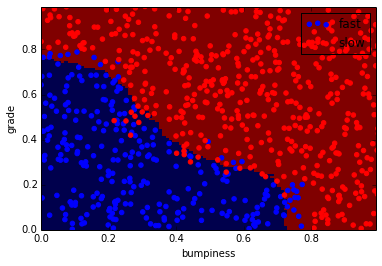

In [18]:
drawInline(neigh100, features_train, labels_train)

In [ ]:
'''
random forest（随机森林）

优点
1、 在当前的很多数据集上，相对其他算法有着很大的优势，表现良好
2、它能够处理很高维度（feature很多）的数据，并且不用做特征选择
        PS：特征子集是随机选择的
3、在训练完后，它能够给出哪些feature比较重要
        PS：http://blog.csdn.net/keepreder/article/details/47277517
4、在创建随机森林的时候，对generlization error使用的是无偏估计，模型泛化能力强
5、训练速度快，容易做成并行化方法
       PS：训练时树与树之间是相互独立的
6、 在训练过程中，能够检测到feature间的互相影响
7、 实现比较简单
8、 对于不平衡的数据集来说，它可以平衡误差。
9、如果有很大一部分的特征遗失，仍可以维持准确度。

缺点：
1、随机森林已经被证明在某些噪音较大的分类或回归问题上会过拟
2、对于有不同取值的属性的数据，取值划分较多的属性会对随机森林产生更大的影响，
所以随机森林在这种数据上产出的属性权值是不可信的。

'''

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF10clf = RandomForestClassifier(n_estimators=10)
RF10clf.fit(features_train, labels_train) 

Rf10Pred = RF10clf.predict(features_test)



acc_rf10 = accuracy_score(Rf10Pred, labels_test)

print acc_rf10

0.912


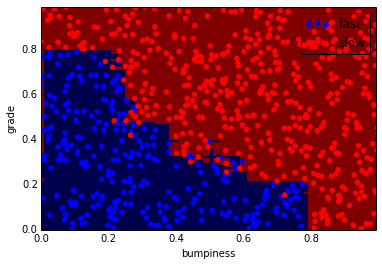

In [28]:
drawInline(RF10clf, features_train, labels_train)

In [ ]:
'''
adaboost

1、很好的利用了弱分类器进行级联。

2、可以将不同的分类算法作为弱分类器。Adaboost算法提供的是框架。
当使用简单分类器时，计算出的结果是可以理解的。
而且弱分类器构造极其简单（例如使用决策桩，桩的选择依据可以是信息增益，误分类率，GINI不纯度等）。

3、AdaBoost具有很高的精度。

4、相对于bagging算法和Random Forest算法，AdaBoost充分考虑的每个分类器的权重。

5, 简单，不用做特征筛选。

6，不用担心overfitting

缺点
1、AdaBoost迭代次数也就是弱分类器数目不太好设定，可以使用交叉验证来进行确定。执行效果依赖于弱分类器的选择

2、数据不平衡导致分类精度下降。

3、训练比较耗时，每次重新选择当前分类器最好切分点。

4,容易受到噪声干扰

三、AdaBoost应用领域

模式识别、计算机视觉领域，用于二分类和多分类场景
'''

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris = load_iris()
ABclf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(ABclf, iris.data, iris.target)

print scores.mean()       

ImportError: No module named model_selection

In [3]:
#!/usr/bin/python

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))

In [5]:
from IPython.display import display
display(enron_data)

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [7]:
print len(enron_data)

146


In [10]:
print type(enron_data)

<type 'dict'>


In [17]:
print enron_data.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

In [19]:
print enron_data.values()[0]

{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}


In [20]:
print len(enron_data.values()[0])

21


In [23]:
count =0

for person in enron_data.keys():
    if enron_data[person]["poi"]==1:
        count+=1

print count

18


In [24]:
print enron_data["PRENTICE JAMES"]


{'salary': 'NaN', 'to_messages': 'NaN', 'deferral_payments': 564348, 'total_payments': 564348, 'exercised_stock_options': 886231, 'bonus': 'NaN', 'restricted_stock': 208809, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 1095040, 'expenses': 'NaN', 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 'NaN', 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'james.prentice@enron.com', 'from_poi_to_this_person': 'NaN'}


In [25]:
print enron_data["COLWELL WESLEY"]

{'salary': 288542, 'to_messages': 1758, 'deferral_payments': 27610, 'total_payments': 1490344, 'exercised_stock_options': 'NaN', 'bonus': 1200000, 'restricted_stock': 698242, 'shared_receipt_with_poi': 1132, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 698242, 'expenses': 16514, 'loan_advances': 'NaN', 'from_messages': 40, 'other': 101740, 'from_this_person_to_poi': 11, 'poi': True, 'director_fees': 'NaN', 'deferred_income': -144062, 'long_term_incentive': 'NaN', 'email_address': 'wes.colwell@enron.com', 'from_poi_to_this_person': 240}


In [30]:
print enron_data["SKILLING JEFFREY K"]

{'salary': 1111258, 'to_messages': 3627, 'deferral_payments': 'NaN', 'total_payments': 8682716, 'exercised_stock_options': 19250000, 'bonus': 5600000, 'restricted_stock': 6843672, 'shared_receipt_with_poi': 2042, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 26093672, 'expenses': 29336, 'loan_advances': 'NaN', 'from_messages': 108, 'other': 22122, 'from_this_person_to_poi': 30, 'poi': True, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 1920000, 'email_address': 'jeff.skilling@enron.com', 'from_poi_to_this_person': 88}


In [31]:
print enron_data["SKILLING JEFFREY K"]['total_payments']

8682716


In [32]:
print enron_data["LAY KENNETH L"]['total_payments']

103559793


In [33]:
print enron_data["FASTOW ANDREW S"]['total_payments']

2424083


In [36]:
count1 =0
count2 =0

for person in enron_data.keys():
    if enron_data[person]["salary"]!='NaN':
        count1 +=1
    if enron_data[person]["email_address"] != 'NaN' :
        count2 +=1

print count1, count2

95 111


In [ ]:
'''
不能将 python 字典直接读入到 sklearn 分类或回归算法中；

它其实需要一个 numpy 数组，或者一个由列表组成的列表（此列表本身是一个列表，它的每个元素都是数据点，而较小列表的元素是该点的特征）。

我们编写了一些辅助函数（tools/feature_format.py 中的 featureFormat() 和 targetFeatureSplit()），
它们可以获取特征名的列表和数据字典，然后返回 numpy 数组。

如果特征没有某个特定人员的值，此函数还会用 0（零）替换特征值。

'''

In [50]:
count1 =0
count2 =0

for person in enron_data.keys():


    if enron_data[person]["total_payments"] =='NaN':
        count1 +=1
    

print count1 , count2

21 0


In [ ]:
####### regression ###########3

'''
continuous :  ordered items have relations ! 

discrete : ordered items have no relations ! 
'''